In [1]:
# Needed libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploaded Dataset
df =pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [4]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

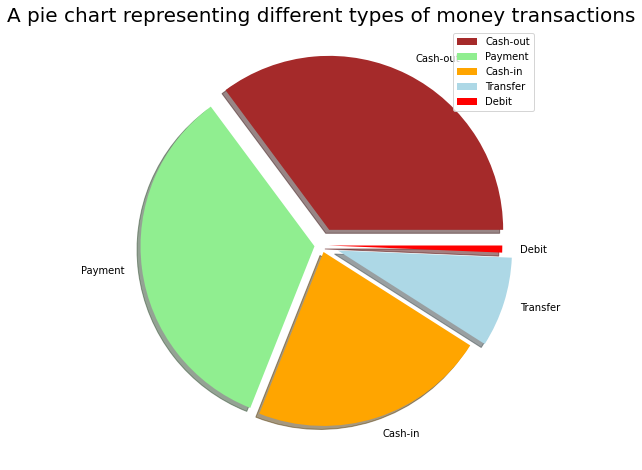

In [66]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['brown', 'lightgreen', 'orange', 'lightblue', 'red']
explode = [0.1, 0.04, 0.04, 0.1, 0.04]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
(df['isFraud']==1).value_counts()

False    6354407
True        8213
Name: isFraud, dtype: int64

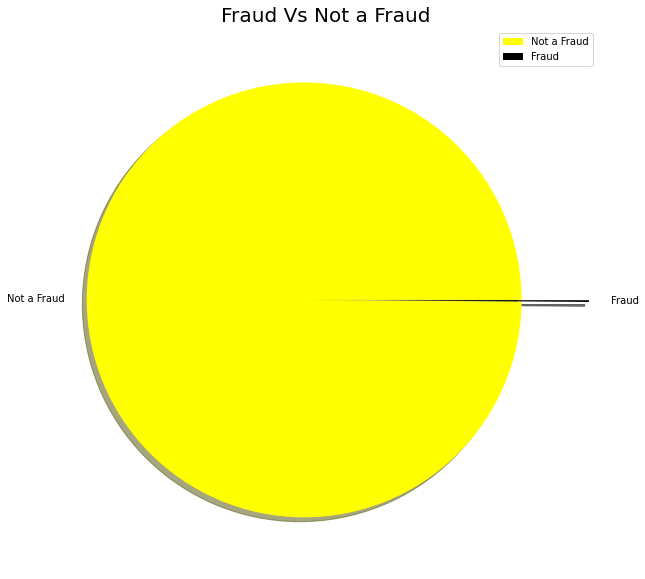

In [67]:
labels = ['Not a Fraud', 'Fraud']
colors = ['yellow', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('Fraud Vs Not a Fraud',fontsize = 20)
plt.legend()
plt.show()

In [8]:
df['nameDest'].str.startswith('M').value_counts()

False    4211125
True     2151495
Name: nameDest, dtype: int64

In [9]:
# checking for debit type
debit =df[df['type']=='DEBIT']
(debit['isFraud']==1).value_counts()

False    41432
Name: isFraud, dtype: int64

In [11]:
# Checking for Cash in Type
cash_in =df[df['type']=='CASH_IN']
cash_in

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0


In [12]:
(cash_in['isFraud']==1).value_counts() 

False    1399284
Name: isFraud, dtype: int64

In [13]:
(cash_in['isFlaggedFraud']==1).value_counts() 

False    1399284
Name: isFlaggedFraud, dtype: int64

In [14]:
#Checking for Transfer Type
transfer =df[df['type']=='TRANSFER']
transfer

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0


In [15]:
(transfer['isFlaggedFraud']==1).value_counts() 

False    532893
True         16
Name: isFlaggedFraud, dtype: int64

In [16]:
(transfer['isFraud']==1).value_counts() 

False    528812
True       4097
Name: isFraud, dtype: int64

In [17]:
# checking for Cash out type 
cash_out =df[df['type']=='CASH_OUT']
cash_out

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [18]:
(cash_out['isFraud']==1).value_counts() 

False    2233384
True        4116
Name: isFraud, dtype: int64

In [19]:
(cash_out['isFlaggedFraud']==1).value_counts() 

False    2237500
Name: isFlaggedFraud, dtype: int64

In [20]:
# Checking For Payment Type
payment =df[df['type']=='PAYMENT']
payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [21]:
(payment['isFraud']==1).value_counts() 

False    2151495
Name: isFraud, dtype: int64

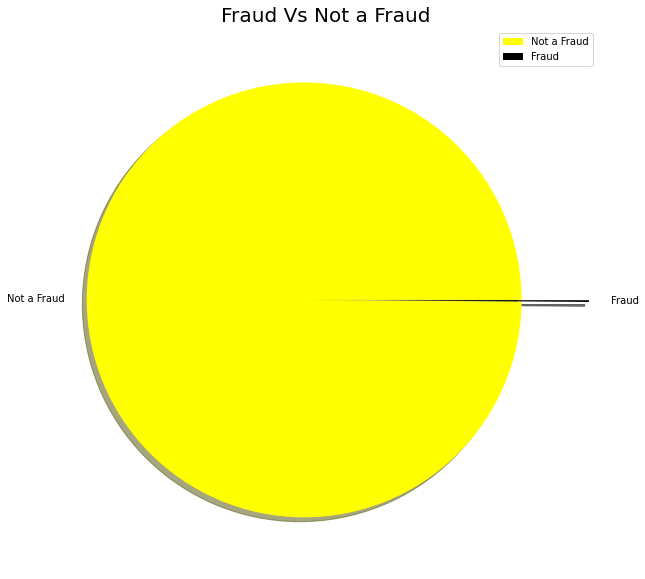

In [65]:
labels = ['Not a Fraud', 'Fraud']
colors = ['yellow', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('Fraud Vs Not a Fraud',fontsize = 20)
plt.legend()
plt.show()

In [22]:
def unique_col_value(df):
    for column in df:
        if df[column].dtype=='object':
            print(column,df[column].unique())
    

In [23]:
unique_col_value(df)

type ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [24]:
payment[payment['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [25]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [27]:
df['step'].value_counts().nunique()

428

In [28]:
df.step

0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64

In [29]:
df.loc[df.isFlaggedFraud == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [30]:
df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values


array(['TRANSFER'], dtype=object)

In [31]:
df['errorBalanceOrig'] = df.newbalanceOrig + df.amount - df.oldbalanceOrg
df['errorBalanceDest'] = df.oldbalanceDest + df.amount - df.newbalanceDest
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,8.500025e+05


In [32]:
# removing unwanted columns

df = df.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
df.shape

(6362620, 11)

In [33]:
df= df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
df.shape

(2770409, 11)

In [34]:
df['type'].replace('TRANSFER', 0, inplace = True)
df['type'].replace('CASH_OUT', 1, inplace = True)

In [35]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.00,0.00,1,0,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,1,0,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,0,0,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,0,0,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00,1,0,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00,1,0,0.00,8.500025e+05


In [36]:
df['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [37]:
# making independent set
x = df.drop(['isFraud'], axis = 1)

# making dependent set

y = df['isFraud']

# getting the shapes of x and ya
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


# OVER-SAMPLING

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE()
x_resample, y_resample = smote.fit_sample(x, y.values)

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

<IPython.core.display.Javascript object>

In [42]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [43]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
4075301,416,1,7.133088e+04,7.133088e+04,0.0,1.115995e+07,1.123128e+07,0,0.00,-8.794873e-03
320323,37,1,2.337126e+05,3.210000e+02,0.0,1.261804e+06,1.495517e+06,0,233391.62,0.000000e+00
3152929,237,1,2.401526e+06,2.401526e+06,0.0,3.870266e+05,2.788552e+06,0,0.00,3.828839e-10
3791198,371,1,2.447482e+05,2.447482e+05,0.0,3.855090e+05,6.302571e+05,0,0.00,-5.766384e-03
2486284,397,1,2.780528e+05,4.218900e+04,0.0,1.099345e+05,3.879873e+05,0,235863.80,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
2249467,356,0,9.122938e+05,0.000000e+00,0.0,1.286149e+06,2.198443e+06,0,912293.75,4.656613e-10
5157699,521,0,3.648148e+05,3.648148e+05,0.0,0.000000e+00,0.000000e+00,0,0.00,3.648148e+05
2215104,354,0,6.858944e+05,0.000000e+00,0.0,3.010343e+06,3.696238e+06,0,685894.42,-1.000000e-02
1484405,255,0,1.964795e+05,0.000000e+00,0.0,3.937246e+05,5.902041e+05,0,196479.50,-1.000000e-02


# Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
from sklearn.model_selection import GridSearchCV
import xgboost

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
         }
    
    
    }
}
dir(model_params)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
import numpy as np

In [ ]:
cores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [47]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier(eval_metric='logloss')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='approx',
              validate_parameters=1, verbosity=None)

In [68]:
y_pred = model.predict(x_test)

# Model score on the test dataset
model.score(x_test,y_test)

0.9995800445116615

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553120
           1       1.00      1.00      1.00    551759

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879



<IPython.core.display.Javascript object>

Text(69.0, 0.5, 'truth')

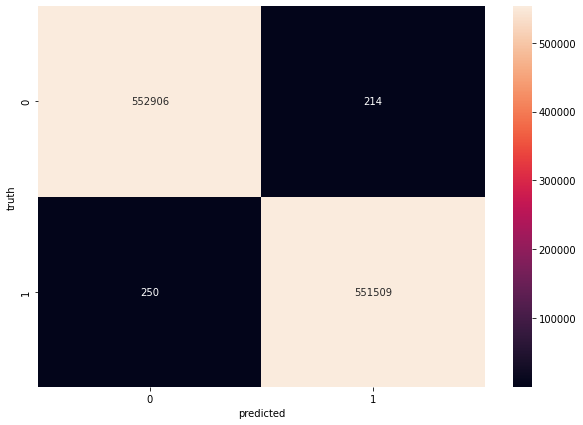

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')